In [6]:
pip install --default-timeout=100 -r requirements.txt


     ---------------------------------------- 0.0/46.1 kB ? eta -:--:--
     ------------------------- ------------ 30.7/46.1 kB 640.0 kB/s eta 0:00:01
     ------------------------- ------------ 30.7/46.1 kB 640.0 kB/s eta 0:00:01
     -------------------------------------- 46.1/46.1 kB 325.9 kB/s eta 0:00:00
   ---------------------------------------- 0.0/52.6 kB ? eta -:--:--
   ---------------------------------------- 52.6/52.6 kB 1.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/211.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/211.9 kB ? eta -:--:--
   ----- ---------------------------------- 30.7/211.9 kB 1.3 MB/s eta 0:00:01
   ------------- ------------------------- 71.7/211.9 kB 787.7 kB/s eta 0:00:01
   -------------------- ----------------- 112.6/211.9 kB 819.2 kB/s eta 0:00:01
   -------------------- ----------------- 112.6/211.9 kB 819.2 kB/s eta 0:00:01
   ---------------------- --------------- 122.9/211.9 kB 514.3 kB/s eta 0:00:0


[notice] A new release of pip is available: 23.3.2 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


## EDA on Azure Functions Access Logs

In [36]:
import pandas_datareader as pdr
import pandas as pd
from datetime import datetime
from matplotlib import pyplot as plt
import seaborn as sns

In [13]:
df=pd.read_csv(r'C:\Users\adity\Serverless-Predictive-Autoscaling\Dataset\azurefunctions-accesses-2020.csv')
df.head()

,Timestamp,AnonRegion,AnonUserId,AnonAppName,AnonFunctionInvocationId,AnonBlobName,BlobType,AnonBlobETag,BlobBytes,Read,Write
0,1.606090e+12,6ex,775920313,9gti3olh,1565080819,jfvf7k9kwiiq7gdx,BlockBlob/application/octet-stream,kq2su6bhi0,30,True,False
1,1.606930e+12,6ex,1252244298,7c51my6n,1191849141,1fjxqoqi2nc5njpg,BlockBlob/application/zip,ibd6a5v5pv,1938488,True,False
2,1.606360e+12,iic,1495523193,uf2u84b0,1302383289,tp783etybrgxap8x,BlockBlob/,6mreka6qhr,36,False,True
3,1.606920e+12,iic,705112778,1jgfqbn6,1869133266,80lssrlkciitddx9,BlockBlob/,if8foq3a81,2204780,False,True
4,1.606660e+12,6ex,1252244298,15dp5na6,1468781831,juijw2ldiogyem3c,BlockBlob/application/zip,414fgngli4,359512,True,False


## 1. Dataset Overview
This dataset contains logs from Azure Functions accessing **Blob Storage**.  
Each row represents a single function invocation and its interaction with a blob (file).  

### 📑 Columns Description
- **Timestamp** → Date and time when the access event occurred.  
- **AnonRegion** → Anonymized region of request origin.  
- **AnonUserId** → Anonymized unique user identifier.  
- **AnonAppName** → Anonymized application name making the request.  
- **AnonFunctionInvocationId** → Unique anonymized identifier for each function execution.  
- **AnonBlobName** → Anonymized blob (file) name accessed.  
- **BlobType** → Type of blob accessed (BlockBlob, PageBlob, AppendBlob).  
- **AnonBlobETag** → Anonymized entity tag for blob versioning.  
- **BlobBytes** → Size of blob accessed (in bytes).  
- **Read** → Indicates if the operation was a **read** request.  
- **Write** → Indicates if the operation was a **write** request.  



In [17]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'], unit="ms")
df.head()

,Timestamp,AnonRegion,AnonUserId,AnonAppName,AnonFunctionInvocationId,AnonBlobName,BlobType,AnonBlobETag,BlobBytes,Read,Write
0,2020-11-23 00:06:40,6ex,775920313,9gti3olh,1565080819,jfvf7k9kwiiq7gdx,BlockBlob/application/octet-stream,kq2su6bhi0,30,True,False
1,2020-12-02 17:26:40,6ex,1252244298,7c51my6n,1191849141,1fjxqoqi2nc5njpg,BlockBlob/application/zip,ibd6a5v5pv,1938488,True,False
2,2020-11-26 03:06:40,iic,1495523193,uf2u84b0,1302383289,tp783etybrgxap8x,BlockBlob/,6mreka6qhr,36,False,True
3,2020-12-02 14:40:00,iic,705112778,1jgfqbn6,1869133266,80lssrlkciitddx9,BlockBlob/,if8foq3a81,2204780,False,True
4,2020-11-29 14:26:40,6ex,1252244298,15dp5na6,1468781831,juijw2ldiogyem3c,BlockBlob/application/zip,414fgngli4,359512,True,False


In [33]:
print("Dataset Info:")
print(df.info())
print("\nDescriptive Statistics:")
print(df.describe())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 11 columns):
 #   Column                    Non-Null Count    Dtype         
---  ------                    --------------    -----         
 0   Timestamp                 1048575 non-null  datetime64[ns]
 1   AnonRegion                1048575 non-null  object        
 2   AnonUserId                1048575 non-null  int64         
 3   AnonAppName               1048575 non-null  object        
 4   AnonFunctionInvocationId  1048575 non-null  int64         
 5   AnonBlobName              1048575 non-null  object        
 6   BlobType                  1048575 non-null  object        
 7   AnonBlobETag              1048575 non-null  object        
 8   BlobBytes                 1048575 non-null  int64         
 9   Read                      1048575 non-null  bool          
 10  Write                     1048575 non-null  bool          
dtypes: bool(2), datetime64[ns](1), int64

## 📈 Descriptive Statistics

| Statistic | Timestamp | AnonUserId | AnonFunctionInvocationId | BlobBytes |
|-----------|-----------|------------|--------------------------|-----------|
| **Count** | 1,048,575 | 1.048575e+06 | 1.048575e+06 | 1.048575e+06 |
| **Mean**  | 2020-11-29 23:56:53 | 1.254415e+09 | 1.073763e+09 | 4.689896e+05 |
| **Min**   | 2020-11-23 00:06:40 | 4.987473e+06 | 2.121000e+03 | 0.0 |
| **25%**   | 2020-11-26 11:26:40 | 9.364941e+08 | 5.373588e+08 | 2.8e+01 |
| **50%**   | 2020-11-29 22:46:40 | 1.209885e+09 | 1.074069e+09 | 3.05e+02 |
| **75%**   | 2020-12-03 12:53:20 | 1.341677e+09 | 1.610058e+09 | 5.42e+02 |
| **Max**   | 2020-12-07 00:13:20 | 2.126337e+09 | 2.147482e+09 | 1.020542e+09 |
| **Std**   | NaN | 4.223284e+08 | 6.197333e+08 | 3.072950e+06 |

---

In [34]:
df['Hour'] = df['Timestamp'].dt.hour
df['Day'] = df['Timestamp'].dt.day
df['BlobActivity'] = df['Read'] | df['Write']

## ⚒️ Feature Engineering
- Extracted **Hour** and **Day** from `Timestamp`.  
- Created **BlobActivity** as a boolean:  
  ```python
  df["BlobActivity"] = df["Read"] | df["Write"]

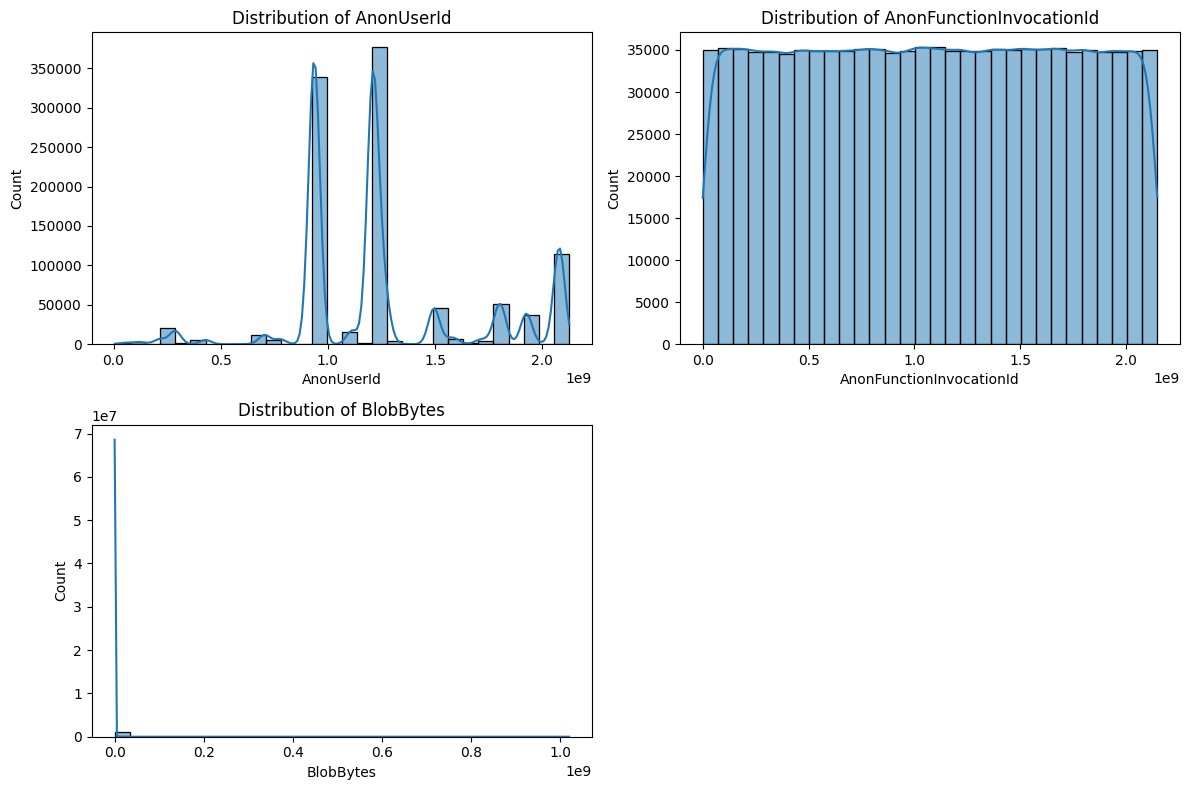

In [37]:
plt.figure(figsize=(12, 8))
for i, column in enumerate(['AnonUserId', 'AnonFunctionInvocationId', 'BlobBytes'], 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[column], kde=True, bins=30)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

C:\Users\adity\AppData\Local\Temp\ipykernel_3756\968093868.py:10: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


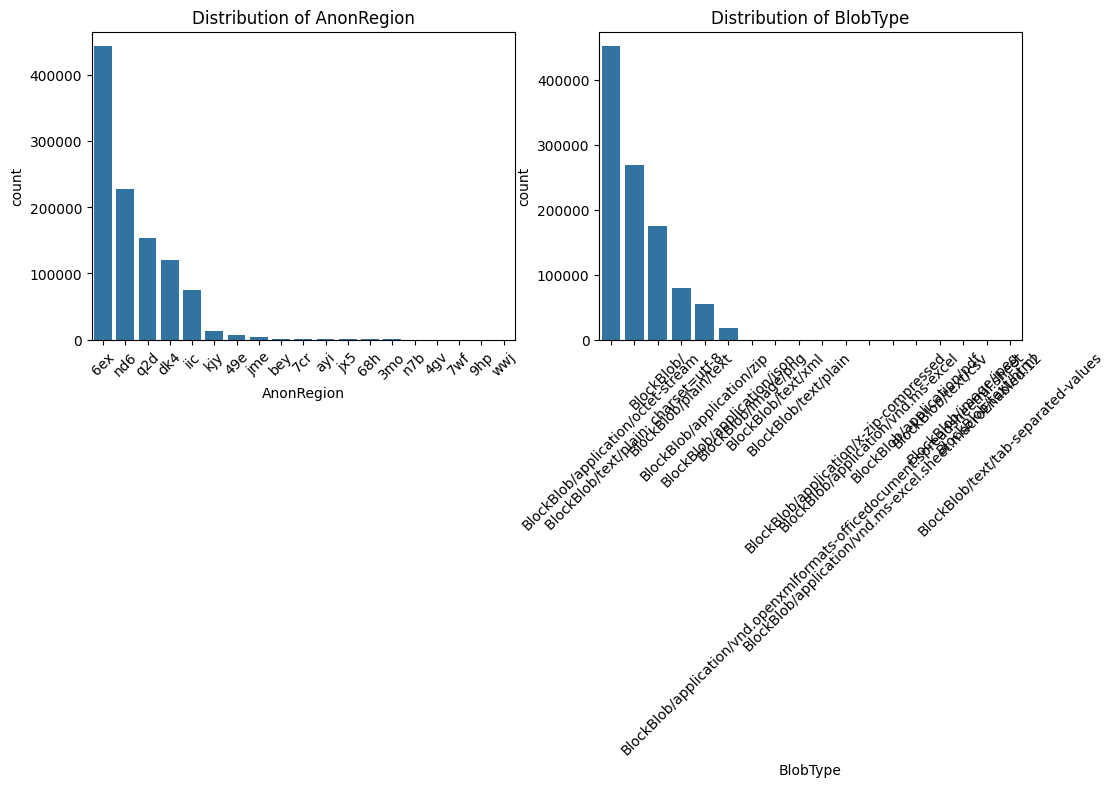

In [38]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.countplot(data=df, x='AnonRegion', order=df['AnonRegion'].value_counts().index)
plt.title('Distribution of AnonRegion')
plt.xticks(rotation=45)
plt.subplot(1, 2, 2)
sns.countplot(data=df, x='BlobType', order=df['BlobType'].value_counts().index)
plt.title('Distribution of BlobType')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

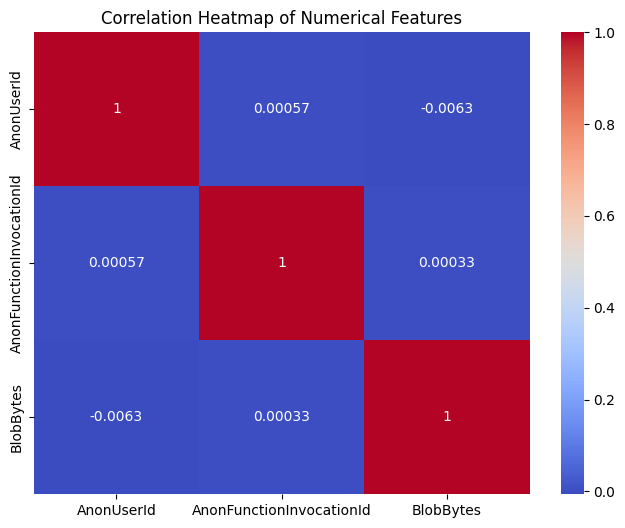

In [39]:
numeric_cols = ['AnonUserId', 'AnonFunctionInvocationId', 'BlobBytes']
plt.figure(figsize=(8, 6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

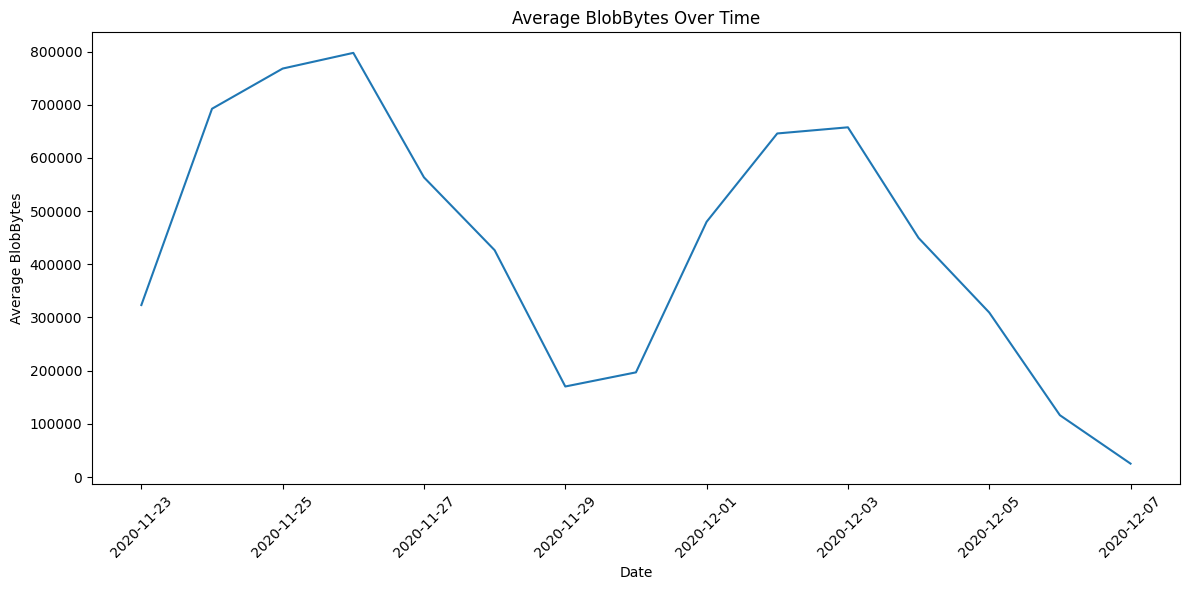

In [40]:
plt.figure(figsize=(12, 6))
df.groupby(df['Timestamp'].dt.date)['BlobBytes'].mean().plot()
plt.xlabel('Date')
plt.ylabel('Average BlobBytes')
plt.title('Average BlobBytes Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 🔍 Key Inferences from Visualizations

### 1. Numerical Distributions
- **AnonUserId:** Highly skewed; a few IDs dominate (peaks at ~30,000+ counts).  
- **AnonFunctionInvocationId:** More uniform, stable counts around 30,000–35,000.  
- **BlobBytes:** Extremely skewed towards small values; rare but large outliers.  

### 2. Categorical Distributions
- **AnonRegion:** Dominated by a few regions (e.g., `6ex`, `nd6` with 300,000+ counts).  
- **BlobType:** `BlockBlob` is the most common (>300,000 counts); others are niche.  

### 3. Correlations
- Weak overall relationships (e.g., ρ = 0.0057 between `AnonUserId` and `AnonFunctionInvocationId`).  
- Variables appear largely independent.  

### 4. Time-Based Trends
- **Average BlobBytes Over Time:**  
  Peaks around **Nov 25–27** and **Dec 1–3**; dips around **Nov 29–Dec 1**.  
- **Blob Activity by Hour:**  
  Stable (~40,000–50,000 counts/hour), with peaks at **hour 0 (midnight)** and **hour 14 (2 PM)**.  

---

In [46]:
proportions = df.groupby('Hour')['BlobActivity'].agg(['count', 'mean'])
proportions['active_proportion_%'] = (proportions['mean'] * 100).round(2)
proportions['active_count'] = (proportions['count'] * proportions['mean']).round(0).astype(int)
proportions['inactive_count'] = (proportions['count'] * (1 - proportions['mean'])).round(0).astype(int)
proportions = proportions.drop('mean', axis=1)  
proportions = proportions.sort_index()  
print(proportions)

      count  active_proportion_%  active_count  inactive_count
Hour                                                          
0     42284                100.0         42284               0
1     45216                100.0         45216               0
2     55544                100.0         55544               0
3     41220                100.0         41220               0
4     43013                100.0         43013               0
5     41313                100.0         41313               0
6     44822                100.0         44822               0
7     41960                100.0         41960               0
8     44296                100.0         44296               0
9     43936                100.0         43936               0
10    42922                100.0         42922               0
11    43383                100.0         43383               0
12    41956                100.0         41956               0
13    41759                100.0         41759         

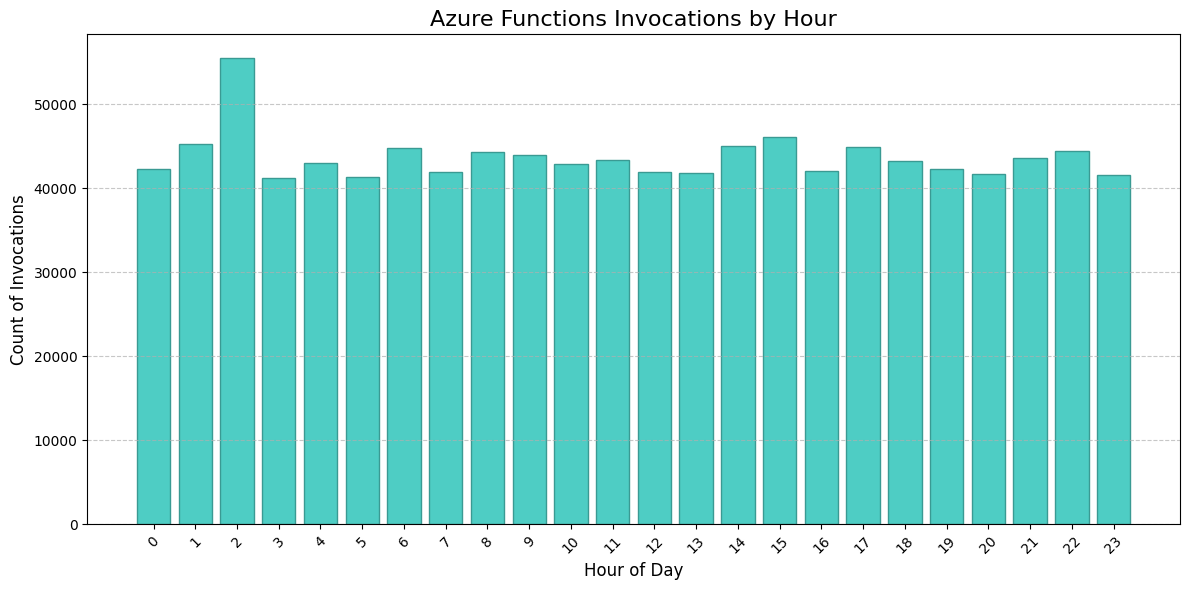

In [47]:
hourly_counts = df.groupby('Hour').size().reindex(range(24), fill_value=0)
plt.figure(figsize=(12, 6))
plt.bar(
    hourly_counts.index,
    hourly_counts.values,
    color='#4ECDC4',  
    edgecolor='#3a9a93',  
    width=0.8
)
plt.title('Azure Functions Invocations by Hour', fontsize=16)
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Count of Invocations', fontsize=12)
plt.xticks(range(24), rotation=45)  
plt.grid(axis='y', linestyle='--', alpha=0.7)  
plt.tight_layout()
plt.show()

---

## 🔎 Workload Insights

### 1. Uniformly Active Workload
- The **100% active proportion** suggests that Azure Functions in this dataset are always interacting with blob storage (either `Read` or `Write`).  
- This behavior is consistent with use cases such as:  
  - Data processing pipelines  
  - File uploads/downloads  
  - Logging mechanisms where each invocation requires storage access  
- **Implication:**  
  - The `BlobActivity` column (derived from `Read | Write`) has **no variation** and therefore is **not useful** as a discriminative feature.  

---

### 2. Temporal Patterns
- **Variation across hours** reveals time-based workload patterns.  
- **Peak at Hour 2** could be due to:  
  - 🌍 **Time Zone Effects:** Corresponds to peak activity in a region (e.g., early morning UTC or EST).  
  - ⚙️ **Scheduled Jobs:** Nightly batch processes, backups, or ETL pipelines.  
- **High activity during Hours 15–17** likely aligns with user-driven activity (business hours in some regions).  
- **Lower activity at Hours 3, 12, and 20** suggests off-peak windows, useful for resource downscaling in autoscaling strategies.  

---

### 3. Autoscaling & Resource Optimization
- Since **100% of invocations involve blob activity**, resource allocation for **storage I/O (bandwidth & latency)** is more critical than CPU/memory.  
- **Invocation counts range**: ~41,220 → 55,544 per hour.  
  - Dynamic autoscaling can optimize costs by:  
    - Scaling **up** during high-load hours (e.g., Hour 2).  
    - Scaling **down** during quieter periods (e.g., Hour 3).  
- No "idle" invocations exist, so optimization should focus on:  
  - Blob access patterns  
  - Caching frequently accessed blobs  
  - Reducing latency in blob reads/writes  

---



In [48]:
read_write_counts = df.groupby('Hour')[['Read', 'Write']].sum()
print(read_write_counts)

       Read  Write
Hour              
0     36458   5826
1     33865  11351
2     45631   9913
3     34067   7153
4     35231   7782
5     30624  10689
6     36670   8152
7     36213   5747
8     38294   6002
9     36826   7110
10    37962   4960
11    36974   6409
12    31232  10724
13    36987   4772
14    36494   8507
15    35639  10499
16    35948   6111
17    34010  10911
18    34142   9131
19    33419   8875
20    33721   7936
21    38028   5540
22    35597   8887
23    33727   7829


In [49]:
region_hourly = df.groupby(['AnonRegion', 'Hour']).size().unstack(fill_value=0)
print(region_hourly)

Hour           0      1      2      3      4      5      6      7      8   \
AnonRegion                                                                  
3mo            13     13      0      5     16      6     10      0     33   
49e             0      0      0      0      0      0      0      0      0   
4gv             0      0      0      0      0      0      0      0      0   
68h             0     95      0      0      0      0      0      0      0   
6ex         16269  14976  20827  14830  19696  19873  24718  25372  22718   
7cr             0      0      0      0      0      0      0      0      0   
7wf             0      0      0      0      0      0      0      0      0   
9hp             0      0      0      0      0      0      0      0      1   
ayi             0      0      0      0      0      0      0      0      0   
bey             0      0      0      0      0      0      0      0      0   
dk4          3196   9773   7458   4556   4079   8082   5420   2712   2552   

In [50]:
blob_size_by_hour = df.groupby('Hour')['BlobBytes'].mean()
print(blob_size_by_hour)

Hour
0     7.590605e+05
1     8.068460e+05
2     5.679491e+05
3     1.789875e+05
4     3.792610e+05
5     7.759455e+05
6     1.042158e+06
7     1.106160e+06
8     9.939284e+05
9     5.430514e+05
10    4.097516e+05
11    2.483836e+05
12    1.625590e+05
13    1.778857e+05
14    1.817037e+05
15    2.283283e+05
16    3.117237e+05
17    4.019705e+05
18    3.710271e+05
19    2.988349e+05
20    2.811766e+05
21    2.152401e+05
22    2.641284e+05
23    5.019875e+05
Name: BlobBytes, dtype: float64


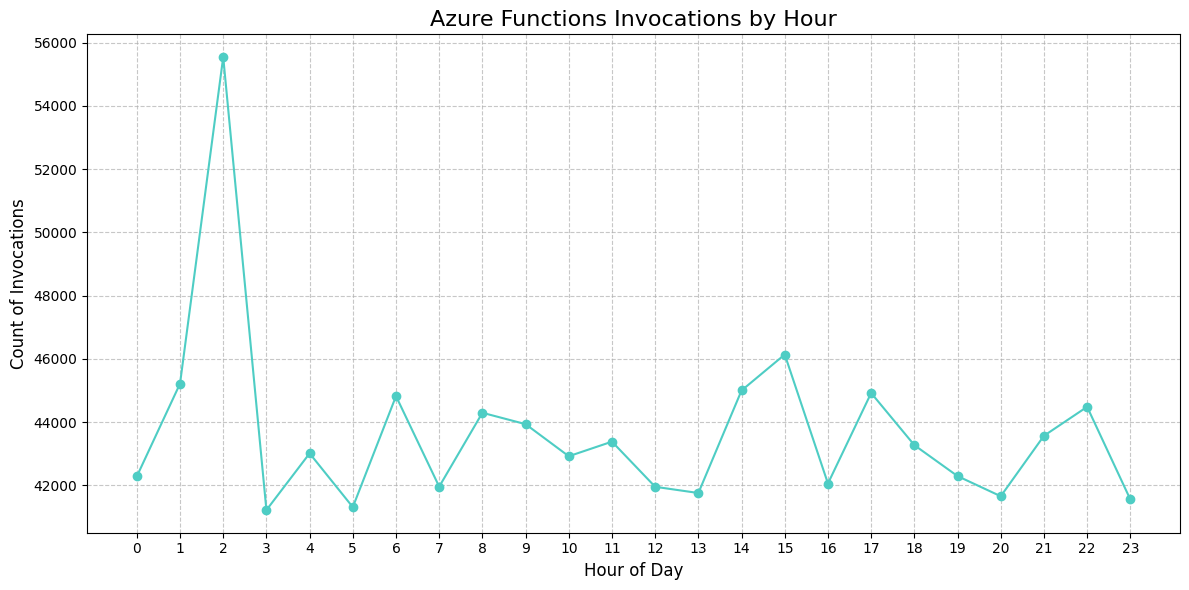

In [51]:
plt.figure(figsize=(12, 6))
plt.plot(hourly_counts.index, hourly_counts.values, marker='o', color='#4ECDC4')
plt.title('Azure Functions Invocations by Hour', fontsize=16)
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Count of Invocations', fontsize=12)
plt.xticks(range(24))
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

---

## 📊 Inferences

### 1. Invocation Patterns (AnonRegion vs. Hour)

**Peak Activity:**
- **Hour 2** has the highest invocation count (**55,544**), likely due to:
  - Scheduled batch processes (e.g., data processing, backups).
  - Peak user activity in a specific time zone (e.g., late evening in the US, midday in Asia, assuming UTC).
- **Hour 15 (46,138)** and **Hour 17 (44,921)** also show elevated activity, pointing to user-driven workloads in afternoon/evening hours.

**Low Activity:**
- **Hour 3 (41,220)**, **Hour 12 (41,956)**, and **Hour 20 (41,657)** represent off-peak periods, good candidates for scaling down.

**Regional Contributions:**
- **Top regions**: `6ex`, `nd6`, `q2d`, `dk4`, and `iic` dominate across all hours.  
  - Example: `6ex` consistently contributes high counts (e.g., **20,827 at Hour 2**, **25,372 at Hour 7**).
- **Smaller regions** (e.g., `3mo`, `jme`, `kjy`, `jx5`) contribute sporadically with very low counts (0–36/hour).
- **Localized activity**: Some regions (e.g., `49e`, `ayi`, `bey`) appear only during specific hours (e.g., `49e` has **4,698 at Hour 15**).

**Implication:**  
Autoscaling strategies should be **region-aware**, allocating higher resources to dominant regions (`6ex`, `nd6`) and applying adaptive scaling for sporadic or event-driven regions.

---

### 2. Blob Size Patterns (BlobBytes per Hour)

**High Blob Sizes:**
- **Hour 7:** Avg. **1,106,160 bytes**  
- **Hour 6:** Avg. **1,042,158 bytes**  
- **Hour 8:** Avg. **993,928 bytes**  
- **Hour 0:** Avg. **759,060 bytes**  
➡ Suggests larger files are processed in **early morning hours**, e.g., datasets or media.

**Low Blob Sizes:**
- **Hour 12:** Avg. **162,559 bytes**  
- **Hour 13:** Avg. **177,886 bytes**  
➡ Midday activity corresponds to smaller file accesses (e.g., metadata).

**Correlation with Invocations:**
- **Hour 2:** Highest invocations (**55,544**) but **moderate blob size (567,949 bytes)** → many smaller/medium blob accesses.  
- **Hour 7:** Fewer invocations (**41,960**) but **largest blob size** → fewer but data-heavy operations.

**Implication:**  
- Prioritize **storage bandwidth** during Hours 6–8 (large blobs).  
- Prioritize **compute resources** during Hour 2 (high volume).  
- Implement **caching** for frequently accessed small blobs during peak invocation hours.

---

### 3. Read vs. Write Operations (per Hour)

**Read-Dominant Workload:**
- Reads consistently outnumber writes.  
  - Example: **Hour 2 → 45,631 reads vs. 9,913 writes**.  
  - Example: **Hour 0 → 36,458 reads vs. 5,826 writes**.  
- **Read-to-write ratio**: ~3:1 (Hour 17) to ~7:1 (Hour 10).  
➡ Workload is **heavily skewed toward reads**.

**Write Patterns:**
- Peaks: **Hour 17 (10,911 writes)**, **Hour 15 (10,499)**, **Hour 12 (10,724)** → indicates upload/update activity in these hours.  
- Lows: **Hour 10 (4,960)**, **Hour 13 (4,772)** → align with smaller blob sizes and invocation counts.

**Implication:**  
- Optimize for **read throughput** across all hours.  
- Add extra **write capacity** during Hours 12, 15, and 17.  
- Enable **read caching** to reduce latency and handle high read loads efficiently.

---

✅ **Overall Insight:**  
- **Hour 2 → high-volume, small/medium blobs → compute-heavy.**  
- **Hours 6–8 → fewer but very large blobs → storage-bandwidth heavy.**  
- **Hours 12, 15, 17 → read-heavy with write peaks → need balanced scaling.**



# Last Notes from EDA

## Workload Characteristics for Model Training
- The dataset exhibits a **storage-intensive, read-heavy workload** with **100% blob activity** across all hours.  
- The **LSTM model (pretrained on large workloads)** should focus on predicting scaling decisions based on **invocation volume** and **blob access patterns**.  
- High invocation counts peak at **Hour 2 (55,544)** and secondary peaks at **Hours 15 (46,138)** and **17 (44,921)**, indicating **temporal patterns** that the **Task Sampler** and **Few-Shot Module** can use to generate **scale priors** for diverse workloads (e.g., Azure traces, FunctionBench).  
- Large mean blob sizes (e.g., **Hour 7: 1,106,160 bytes**, **Hour 6: 1,042,158 bytes**) suggest that the **Pretrain LSTM** and **BaseModel (LSTM)** should account for **data-intensive operations**, requiring feature engineering to include `BlobBytes` as a key metric.  

---

## Feature Engineering Inputs
- **Raw Trace Data** (timestamps, invocations, CPU, memory, latency) shows significant hourly variation (**41,220–55,544 invocations**), which can be windowed, aggregated, and normalized in the **Feature Engineering** step to feed into the **LSTM encoder**.  
- The **Read vs. Write split** highlights a **read-dominant pattern** (e.g., Hour 2: **45,631 reads vs. 9,913 writes**) → include this as a feature to inform the **Scaling Decision**.  
- **Regional patterns** (e.g., **6ex, nd6, q2d dominance**) should be incorporated to enable **region-specific scaling priors** in the **Few-Shot Module**.  

---

## Pretraining and Transfer Learning
- The **Pretrain LSTM** on large workloads should leverage:
  - High invocation hours (**Hour 2, 15, 17**).  
  - Large blob size hours (**Hours 6–8**).  
- These can be used to **save weights**, providing a robust base for the **BaseModel (LSTM)** and **LSTM Encoder**.  
- **Online Fine-tune (TL/FSL updates)** can use **real-time metrics** (e.g., Hour 7: **41,960 invocations with 1M+ byte blobs**) to adapt the model to **dynamic workloads**, enhancing the **Prediction Head’s throughput-to-instances mapping**.  

---

## Meta-Learning and Autoscaling
- **Meta-Learning (MAML/Reptile)** with an **Inner-loop (few gradient steps)** and **Meta-optimizer (outer-loop)** can exploit the **temporal variability**:
  - Low: **Hour 3 → 41,220 invocations**.  
  - High: **Hour 2 → 55,544 invocations**.  
- These variations help update **meta-parameters effectively**.  
- The **Autoscaler Controller** should:
  - Scale **compute** for high-invocation hours (Hour 2).  
  - Prioritize **storage bandwidth** for large-blob hours (Hours 6–8).  

---

## Regional and Operational Insights
- **Dominant regions** (**6ex, nd6, q2d**) with consistent activity (e.g., 6ex: **20,827–25,372 invocations**) suggest that the **Task Sampler** should sample diverse workloads from these regions for **Few-Shot training**.  
- The **read-heavy nature** (ratios between **3:1 to 7:1**) means the model should:
  - Optimize for **read throughput**.  
  - Adapt to **occasional write-heavy periods** (e.g., Hour 17: **10,911 writes**).  
